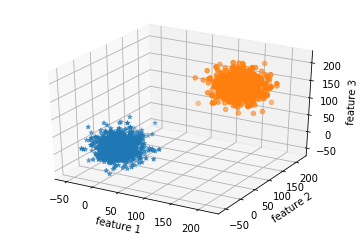

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import random



#deriving 2 cluster one around mean 5 and other around 150 with standard deviation of 20

c1=[(random.gauss(5,20),random.gauss(5,20),random.gauss(5,20)) for x in range(1000)]
c2=[(random.gauss(150,20),random.gauss(150,20),random.gauss(150,20)) for x in range(1000)]



#cluster 1 x,y,z coordinates
x1=[c1[x][0] for x in range(len(c1))]
y1=[c1[x][1] for x in range(len(c1))]
z1=[c1[x][2] for x in range(len(c1))]

#cluster 2 points
x2=[c2[x][0] for x in range(len(c2))]
y2=[c2[x][1] for x in range(len(c2))]
z2=[c2[x][2] for x in range(len(c2))]


 
#plotting scatterplot to see if data is linearly seperable
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('feature 1')
ax.set_ylabel('feature 2')
ax.set_zlabel('feature 3')

ax.scatter(x1,y1,z1,marker="*")
ax.scatter(x2,y2,z2,marker="o")
plt.show()

In [2]:
#combining 2 cluster to form the dataset

training=[]
testing=[]


trainxp=int(0.8*len(x1))





for x in range(trainxp):
    training.append([x1[x],y1[x],z1[x],1])
    training.append([x2[x],y2[x],z2[x],0])
    
for x in range(trainxp,len(x1)):
    testing.append([x1[x],y1[x],z1[x],1])
    testing.append([x2[x],y2[x],z2[x],0])





In [3]:
#split dataset into features X and target y 

import pandas as pd

d1=pd.DataFrame(training)
d2=pd.DataFrame(testing)


d1 = d1.sample(frac=1).reset_index(drop=True)
d2 = d2.sample(frac=1).reset_index(drop=True)


X = d1.iloc[:, [0,1,2]].values
y = d1.iloc[:, 3].values


X_test = d2.iloc[:, [0,1,2]].values
y_test = d2.iloc[:, 3].values


In [4]:
#initialize random weights
W=np.random.rand(3,1)

xlen=len(X)
#appending bias
X=np.array(X)
new_col=np.ones((xlen,1))
X = np.append(new_col,X, 1)

#appending bias to weight
new_col=np.ones((len(W.T),1))
W = np.append(new_col,W.T, 1)


y=np.array(y)

X=X.T
y=y.reshape(xlen,1)


mse=[]




In [5]:
#perceptron algorithm


for i in range(500):
    Z=np.dot(W,X)
    At = np.where(Z <= 0, 0, 1)
    loss=y-At.T
    mse.append(np.sum((loss**2),axis=0))
    W=W.T+(0.000001*np.dot(X,loss))
    W=W.T

    
#after trying learning rate 1, 0.1, 0.001, 0.0001, 0.00001 , 0.000001 and 0.0000001
#found that model fr given data converge fastest at learning rate 0.000001


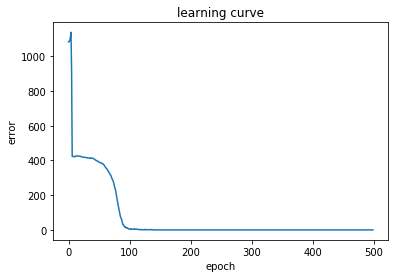

In [6]:


%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

xa=[x for x in range(0,500)]

plt.plot(xa,mse)

plt.xlabel('epoch')
plt.ylabel('error')

plt.title('learning curve')

plt.show()




In [7]:

#plotting plane with wireframe


W=W[0]  


a1x=-W[0]/W[1]
b1x=-W[0]/W[2]
c1x=-W[0]/W[3]



point3  = np.array([0,0,c1x])
normal3 = np.array([W[1],W[2],W[3]])


d3 = -np.sum(point3*normal3)# dot product

xx, yy = np.meshgrid(range(-50,200), range(-50,200))

z3 = (-normal3[0]*xx - normal3[1]*yy - d3)*1./normal3[2]



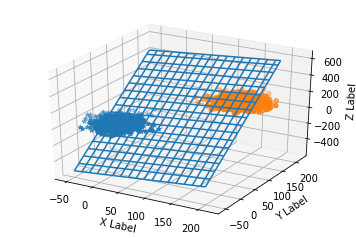

In [8]:
from importlib import reload
reload(plt)
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

ax.scatter(x1,y1,z1,marker="*")
ax.scatter(x2,y2,z2,marker="o")

# plot the surface
#plt3d = plt.figure().gca(projection='3d')

ax.plot_wireframe(xx,yy,z3,rstride=15, cstride=15)

plt.show()



#zc=slopex*xc+slopey*yc+intercept
#ax.scatter(x1,y1,z1,marker="*")
#ax.scatter(x2,y2,z2,marker="o")
#ax.plot(xc,yc,zc)
#plt.show()

In [9]:
#testing for test set

xtlen=len(X_test)
#appending bias
X_test=np.array(X_test)
new_col=np.ones((xtlen,1))
X_test = np.append(new_col,X_test, 1)
y_test=np.array(y_test)
X_test=X_test.T
y_test=y_test.reshape(xtlen,1)

Zt=np.dot(W,X_test) 
At = np.where(Zt <= 0, 0, 1)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, At.T)

cm

array([[198,   2],
       [  0, 200]], dtype=int64)